<a href="https://colab.research.google.com/github/fahad686/ai-ml-navttc-course/blob/main/malaria_penumonia_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
print('Fahad')

Fahad


In [4]:
# Setup
import tensorflow as tf
import tensorflow_datasets as tfds

# Load dataset
(ds_train, ds_test), ds_info = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True,
)

# Preprocess
def preprocess(image, label):
    image = tf.image.resize(image, [128,128])
    image = image/255.0
    return image, label

ds_train = ds_train.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)




In [5]:
# Train
history = model.fit(
    ds_train,
    epochs=3,
    validation_data=ds_test
)

# Evaluate
loss, acc = model.evaluate(ds_test)
print("Test accuracy: {:.2f}%".format(acc * 100))

Epoch 1/3
689/689 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7768 - loss: 0.4696 - val_accuracy: 0.9467 - val_loss: 0.1672
Epoch 2/3
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9511 - loss: 0.1501 - val_accuracy: 0.9521 - val_loss: 0.1561
Epoch 3/3
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9593 - loss: 0.1273 - val_accuracy: 0.9561 - val_loss: 0.1460
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9543 - loss: 0.1355
Test accuracy: 95.61%


In [6]:
import matplotlib.pyplot as plt
(dt_train, dt_test), dt_info = tfds.load(
    'pneumonia_mnist',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

print(dt_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.RE2D38_1.0.0/pneumonia_mnist-train.tfrecord*...…

Generating val examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.RE2D38_1.0.0/pneumonia_mnist-val.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.RE2D38_1.0.0/pneumonia_mnist-test.tfrecord*...:…

Dataset pneumonia_mnist downloaded and prepared to /root/tensorflow_datasets/pneumonia_mnist/1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='pneumonia_mnist',
    full_name='pneumonia_mnist/1.0.0',
    description="""
    # MedMNIST Pneumonia Dataset
    
    The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray
    images. The task is binary-class classification of pneumonia against normal. The
    source training set is split with a ratio of 9:1 into training and validation
    set, and use its source validation set as the test set. The source images are
    gray-scale, and their sizes are (384–2,916) × (127–2,713). The images are
    center-cropped with a window size of length of the short edge and resized into 1
    × 28 × 28.
    """,
    homepage='https://medmnist.com//',
    data_dir='/root/tensorflow_datasets/pneumonia_mnist/1.0.0',
    file_format=tfrecord,
    download_size=3.98 MiB,
    dataset_size=3.66 MiB,
    feature

In [7]:
# ✅ Normalize + resize (if needed)
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, [128, 128])  # upscale a bit
    return image, label

BATCH_SIZE = 32

train_ds = dt_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = dt_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


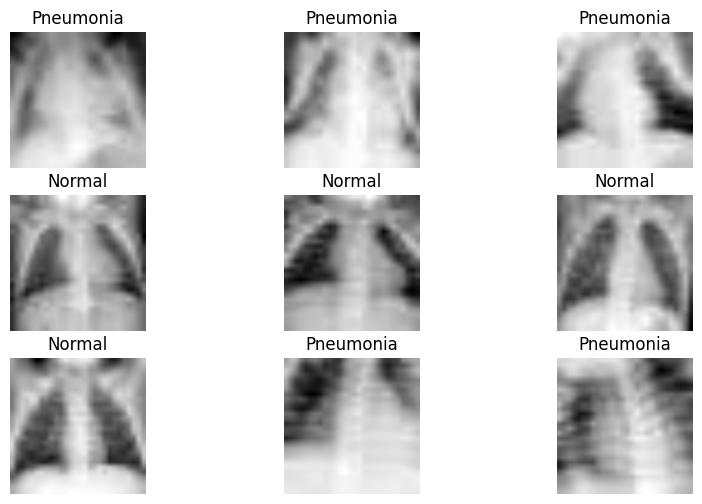

In [11]:
plt.figure(figsize=(10, 6))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title("Pneumonia" if labels[i]==1 else "Normal")
        plt.axis("off")
plt.show()


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#now i am going to train model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5
)


Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.7948 - loss: 0.4560 - val_accuracy: 0.9406 - val_loss: 0.1844
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9141 - loss: 0.2226 - val_accuracy: 0.9565 - val_loss: 0.1187
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9357 - loss: 0.1539 - val_accuracy: 0.9607 - val_loss: 0.1126
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9503 - loss: 0.1368 - val_accuracy: 0.9618 - val_loss: 0.1102
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9495 - loss: 0.1236 - val_accuracy: 0.9692 - val_loss: 0.0913


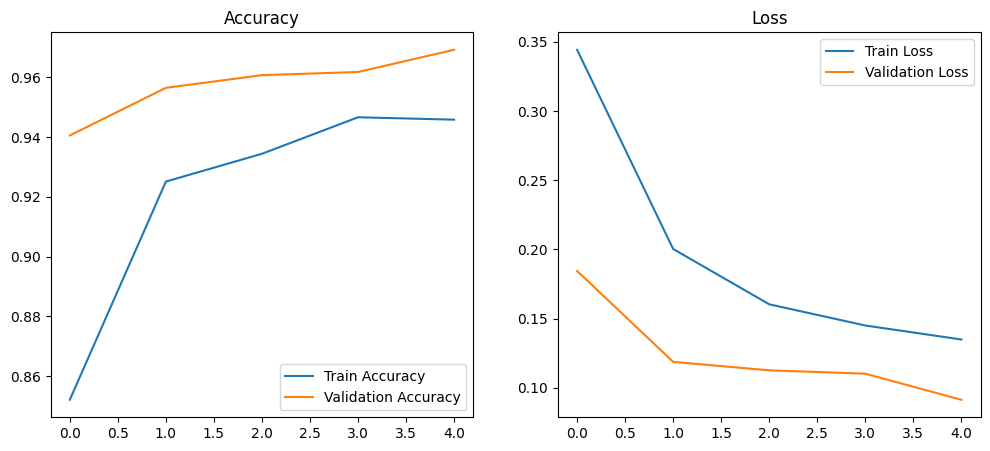

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [15]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Final Test Accuracy: {test_acc * 100:.2f}%")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9619 - loss: 0.1001
✅ Final Test Accuracy: 96.92%
